  # Project: Loan Default Predictor

In [40]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv(r'E:\My_Portfolio_Projects\ML Models\Loan_prediction_model\lending_club_loan_two.csv', encoding='utf-8') 
color1 = '#F5F5DC'
color2 = '#4B0082'

 # Data Preprocessing

In [42]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [44]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Remove Unnecessary Columns

In [45]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [46]:

df.drop(['emp_title' , 'initial_list_status' , 'application_type' , 'mort_acc' , 'address','issue_d','purpose','title' ,'pub_rec' ], axis=1 , inplace = True )


### Fix data types  

In [47]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
dti                     float64
earliest_cr_line         object
open_acc                float64
revol_bal               float64
revol_util              float64
total_acc               float64
pub_rec_bankruptcies    float64
dtype: object

In [48]:

categorical_cols = ['term', 'grade', 'sub_grade', 'verification_status', 'home_ownership', 
                    'loan_status']
for col in categorical_cols : 
   df[col] =  df[col].astype('category')

In [49]:
df['loan_amnt'] = df['loan_amnt'].replace({r'\$' : '' , ',' : ''} , regex = True).astype(float)

In [50]:
df.dtypes

loan_amnt                float64
term                    category
int_rate                 float64
installment              float64
grade                   category
sub_grade               category
emp_length                object
home_ownership          category
annual_inc               float64
verification_status     category
loan_status             category
dti                      float64
earliest_cr_line          object
open_acc                 float64
revol_bal                float64
revol_util               float64
total_acc                float64
pub_rec_bankruptcies     float64
dtype: object

### Understand Missing Data

In [51]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
revol_bal                   0
revol_util                276
total_acc                   0
pub_rec_bankruptcies      535
dtype: int64

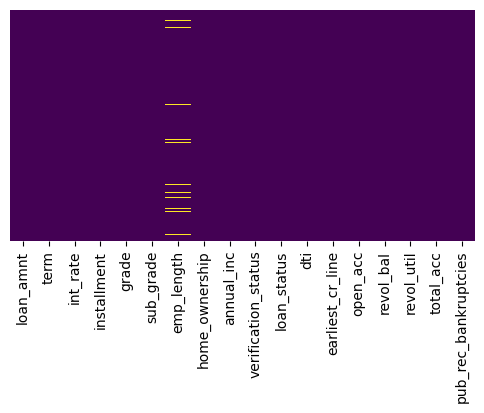

In [52]:
# checking missing value with heatmap .
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False , color = '#4B0082')
plt.show()

### Imputation For Misssing Data

In [53]:
#   revol_util
# I am gonna Use median because percentage values are numeric and the median is robust to outliers.
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())  

In [54]:
# Fill missing values in 'emp_length' with the most frequent value
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

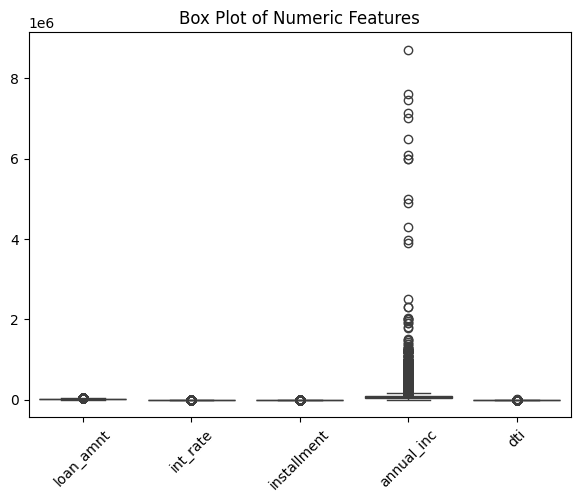

In [55]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']] , color='#4B0082')
plt.xticks(rotation=45)
plt.title("Box Plot of Numeric Features")
plt.show()

###   Outliers removal

In [56]:
# we will use IQR for the following columns 'pub_rec', 'dti', 'open_acc' , 'revol_util' Cause its outliers doesn't make sence or they may errors 
df_original = df.copy()

def remove_outliers(df, columns):
    for col in columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        before_count = df.shape[0] 
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after_count = df.shape[0] 

        print(f"Removed {before_count - after_count} outliers from '{col}'")

    return df 

outlier_con_columns = ['dti', 'open_acc' , 'revol_util']
df = remove_outliers(df, outlier_con_columns)

Removed 275 outliers from 'dti'
Removed 10280 outliers from 'open_acc'
Removed 12 outliers from 'revol_util'


In [57]:
# we will use 'winsorization' method for those outliers that are not necesserly errors but it's a valueble information.
def winsorization(series , lower_percentile=1 , upper_percentile=99): 
    lower_bond = np.percentile(series , lower_percentile)
    upper_bond = np.percentile(series , upper_percentile)
    return np.clip(series , lower_bond , upper_bond) 

df['loan_amnt'] = winsorization(df['loan_amnt'])
df['int_rate'] = winsorization(df['int_rate'])
df['installment'] = winsorization(df['installment'])
df['total_acc'] = winsorization(df['total_acc'])
df['pub_rec_bankruptcies'] = winsorization(df['pub_rec_bankruptcies'])

In [58]:
# the two columns revol_bal and annual_income may not have outliers so we will use 'LOG TRANSFORMATION' for skewed data 
df['annual_inc'] = np.log1p(df['annual_inc'])
df['revol_bal'] = np.log1p(df['revol_bal'])

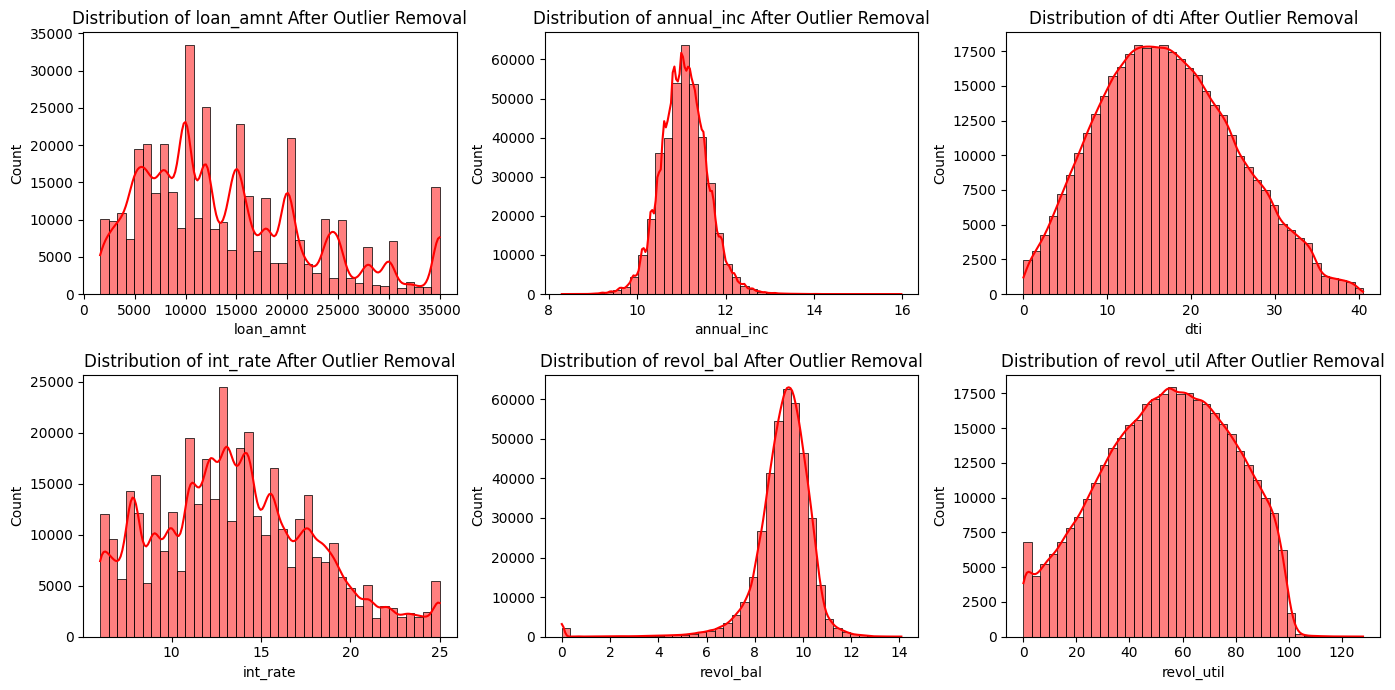

In [59]:
# Visualize selected numerical columns after cleaning
fig, axes = plt.subplots(2, 3, figsize=(14, 7) )
selected_cols = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'revol_bal', 'revol_util']

for i, col in enumerate(selected_cols):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i//3, i%3] , color='red' )
    axes[i//3, i%3].set_title(f'Distribution of {col} After Outlier Removal')

plt.tight_layout()
plt.show()

###     Feature Engineering

In [60]:
df_cleaned = df.copy()

In [61]:
df_cleaned.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,11.669938,Not Verified,Fully Paid,26.24,Jun-1990,16.0,10.501500,41.8,25.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,11.082158,Not Verified,Fully Paid,22.05,Jul-2004,17.0,9.910066,53.3,27.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,10.670303,Source Verified,Fully Paid,12.79,Aug-2007,13.0,9.391661,92.2,26.0,0.0


In [62]:
# new column loan to income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_inc']

In [63]:
# another column installment to income 
df['monthly_inc'] = df['annual_inc'] / 12
df['installment_to_income'] = df['monthly_inc'] / df['installment']

In [64]:
# credit age
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%Y' , errors='coerce')
df['credit_age'] = (pd.Timestamp.today() - df['earliest_cr_line']).dt.days / 365.25
df['credit_age'] = df['earliest_cr_line'].dt.strftime('%b-%Y')

In [65]:
# One-Hot Encoding With drop_first = True for homeOwnership 
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

In [66]:
# term in months 
df['term_in_months'] = df['term'].str.extract('(\\d+)').astype(int)

In [67]:
# number for emp_length 
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
         '6 years', '7 years', '8 years', '9 years', '10+ years']

df['emp_length_encoded'] = pd.Categorical(df['emp_length'], categories=order, ordered=True).codes                                            

In [68]:
# numbers for each grade so model can understand 
grade_order = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
df['grade_encoded'] = df['grade'].map(grade_order)

In [69]:
# Encoding sub_grade  (   A1 is best, G5 is worst   )
sub_grade_order = [f"{g}{n}" for g in "ABCDEFG" for n in range(1, 6)] 
df['sub_grade_encoded'] = pd.Categorical(df['sub_grade'], categories=sub_grade_order, ordered=True).codes

In [70]:
# decoding loan status for prediction 
df['loan_status_decode'] = df['loan_status']
df['loan_status_decode'] = df['loan_status_decode'].map({'Fully Paid' : 1 , 'Charged Off' : 0 })

In [71]:
df.head(2)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,...,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,term_in_months,emp_length_encoded,grade_encoded,sub_grade_encoded,loan_status_decode
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,11.669938,Not Verified,Fully Paid,...,0,0,0,0,1,36,10,6,8,1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,11.082158,Not Verified,Fully Paid,...,1,0,0,0,0,36,4,6,9,1


In [72]:
print(df['verification_status'].value_counts())

verification_status
Verified           135150
Source Verified    127951
Not Verified       122362
Name: count, dtype: int64


In [73]:
 df = pd.get_dummies(df, columns=['verification_status'], drop_first=True)

#it showing 'bool' data types we have to convert it to 'integer' so model will understand it better 
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

###      Train-Test Split and Scaling

In [74]:
# Drop raw categorical columns and target from the features
un_usfull = ['term', 'grade', 'sub_grade', 'emp_length', 'loan_status', 'earliest_cr_line', 'credit_age' ]
X = df.drop(columns = un_usfull + ['loan_status_decode', 'loan_to_income_ratio' , 
                                   'installment' , 'pub_rec_bankruptcies' , 'monthly_inc']) # VIF of these columns are very high so i need to remove it  
y = df['loan_status_decode']

# Split the data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on training data and transform both training and test data
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)  

x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)

# print("Scaled Training Features")
# print(x_train_scaled)

### VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
def calculate_vif(df):
    vif_data = pd.DataFrame()  # Create an empty table to store results.
    vif_data["Feature"] = df.columns  # List the names of each feature (block).
    
    # For each feature, calculate the VIF value:
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data
    

In [77]:
df_transformed = df.copy()

In [78]:
# Assume X_train is our data with features that we want to check for redundancy.
X_selected = X_train.copy()  # Make a copy so we don’t change the original data.
vif_result = calculate_vif(X_selected)  # Calculate VIF for each feature.
print(vif_result)  # Show the table of features with their VIF values.


                                Feature         VIF
0                             loan_amnt   11.252614
1                              int_rate  211.878970
2                            annual_inc  798.538509
3                                   dti    7.829296
4                              open_acc   14.594110
5                             revol_bal  102.800190
6                            revol_util   10.030491
7                             total_acc   11.410284
8                 installment_to_income    4.944107
9               home_ownership_MORTGAGE  766.833122
10                  home_ownership_NONE    1.099804
11                 home_ownership_OTHER    1.446659
12                   home_ownership_OWN  144.296147
13                  home_ownership_RENT  615.998725
14                       term_in_months   27.271995
15                   emp_length_encoded    4.052787
16                        grade_encoded  361.782889
17                    sub_grade_encoded  158.426572
18  verifica

# Exploratory Data Analysis

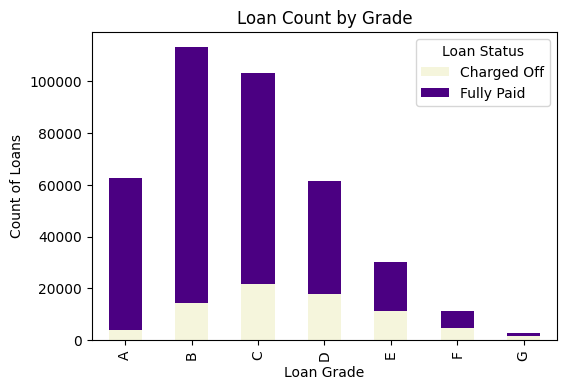

In [79]:
# Group data by 'grade' and 'loan_status' and count the occurrences
stacked_data = df_cleaned.groupby(['grade', 'loan_status'] , observed=True).size().unstack(fill_value=0)

# stacked bar plot
ax = stacked_data.plot(kind='bar', stacked=True , figsize=(6, 4) , color = [color1 , color2])
plt.title("Loan Count by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Count of Loans")
plt.legend(title="Loan Status")
ax.set_facecolor(color='white')
plt.show()

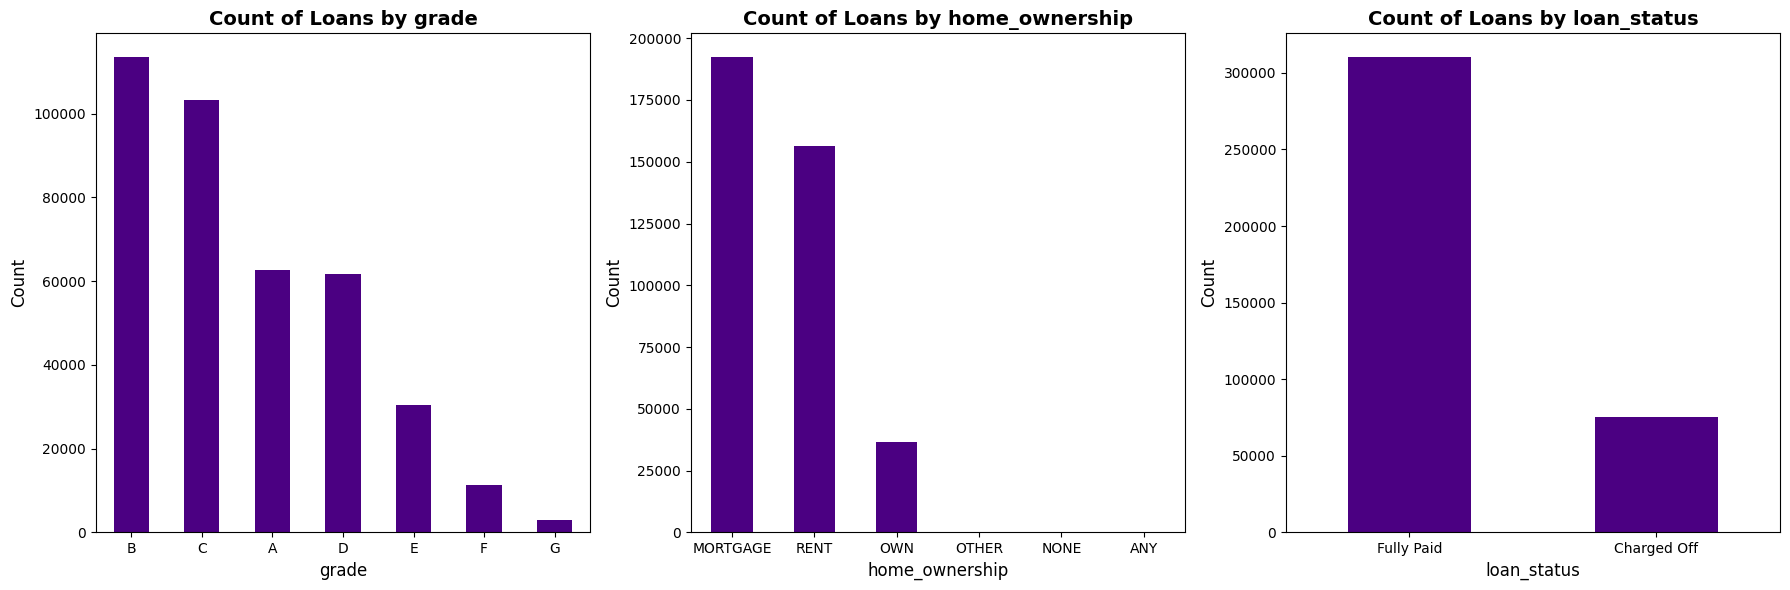

In [80]:
# List of crucial categorical columns
crucial_columns = ['grade','home_ownership','loan_status']

# Create subplots: one row with as many columns as we have crucial columns
fig, axes = plt.subplots(1, len(crucial_columns), figsize=(6 * len(crucial_columns), 6))

# for ax, col in zip(axes, crucial_columns):
#     # Count the occurrences in each category for the column and plot as a bar chart
#     df_cleaned[col].value_counts().plot(kind='bar', ax=ax, color=color2)
#     ax.set_title(f'Count of Loans by {col}', fontsize=14, fontweight='bold')
#     ax.set_xlabel(col, fontsize=12)
#     ax.set_ylabel("Count", fontsize=12)
#     ax.tick_params(axis='x', rotation=45)

                   # OR

for i, col in enumerate(crucial_columns):
    # Count the occurrences in each category for the column and plot as a bar chart
    df_cleaned[col].value_counts().plot(kind='bar', ax=axes[i], color=color2)
    axes[i].set_title(f'Count of Loans by {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()



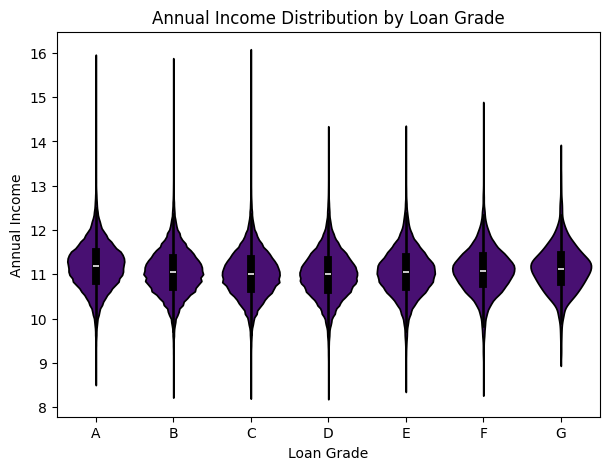

In [81]:
plt.figure(figsize=(7,5))
sns.violinplot(x='grade', y='annual_inc', data=df_cleaned , linecolor = 'black' , color = color2)
plt.title("Annual Income Distribution by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Annual Income")
plt.show()           

In [82]:
df_transformed.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'loan_to_income_ratio', 'monthly_inc',
       'installment_to_income', 'credit_age', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'term_in_months', 'emp_length_encoded',
       'grade_encoded', 'sub_grade_encoded', 'loan_status_decode',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

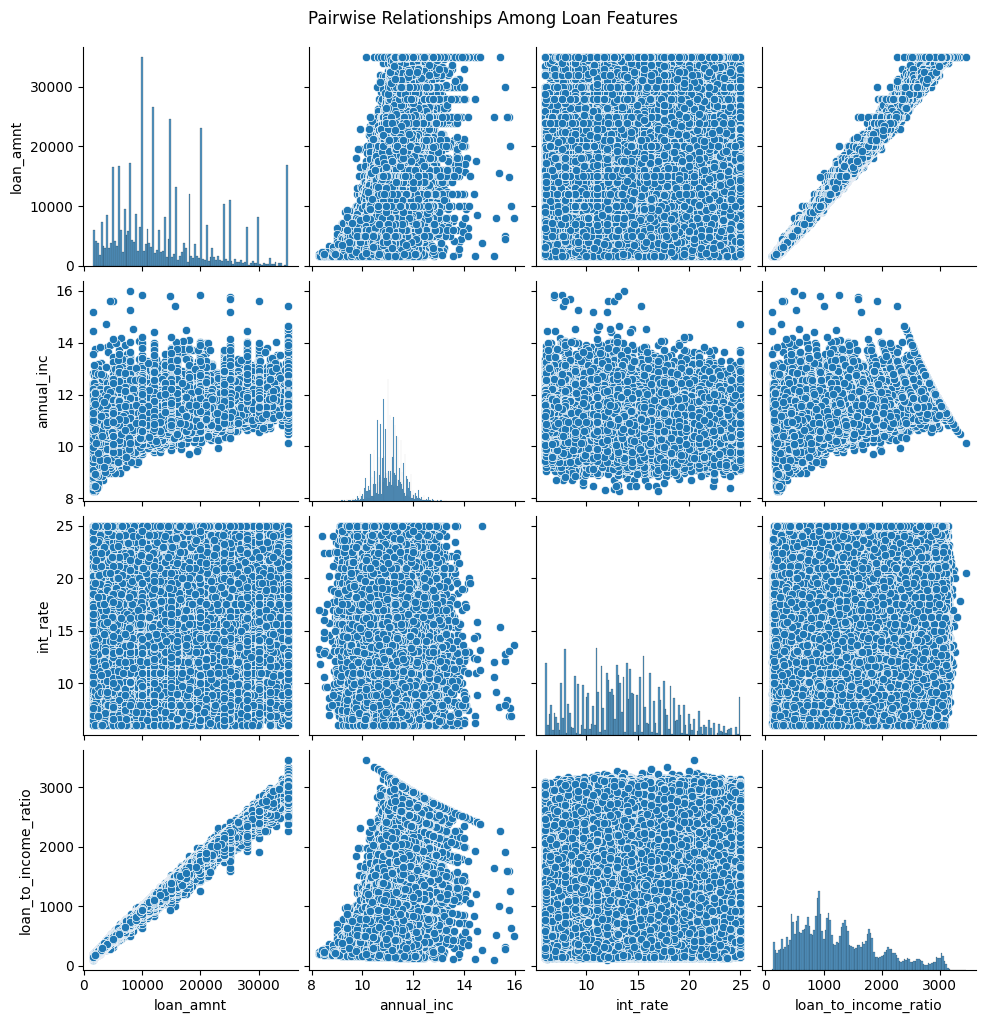

In [83]:
selected_features = ['loan_amnt' ,'annual_inc', 'int_rate' , 'loan_to_income_ratio']
sns.pairplot(df_transformed[selected_features] )
plt.suptitle("Pairwise Relationships Among Loan Features", y=1.02)
plt.show()

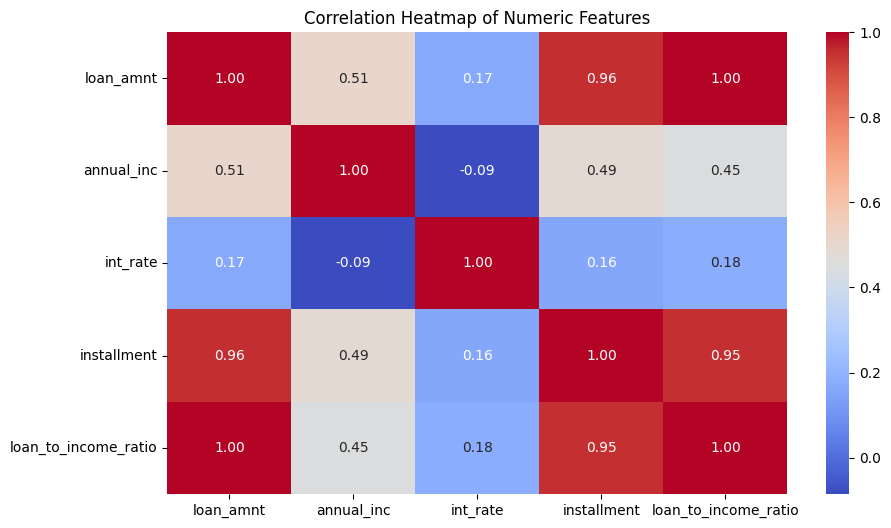

In [84]:
plt.figure(figsize=(10, 6))
numeric_features = ['loan_amnt', 'annual_inc', 'int_rate', 'installment', 'loan_to_income_ratio']
corr_matrix = df[numeric_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### PCA (Principal Component Analysis)

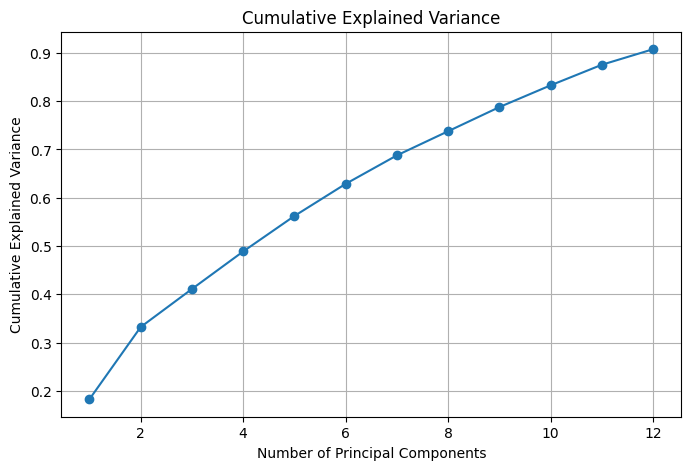

In [85]:
from sklearn.decomposition import PCA
# Plot explained variance ratio
pca = PCA(n_components=12)

# Fit PCA on your data and transform it to get the new, smaller features.
x_pca = pca.fit_transform(x_train_scaled)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()
# This means the first 15 principal components together explain 95% or 97% of the total variance so we will keep only 15 or 12

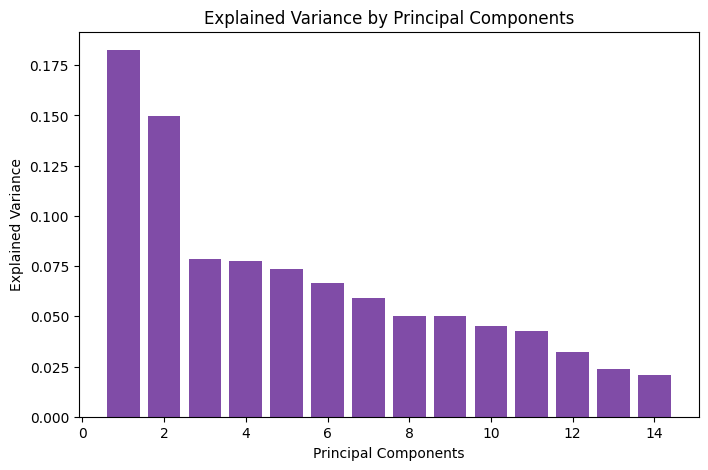

In [86]:
# Let's say you already have your features in X (only numeric ones)
# For our example, we want to reduce our features to 2 principal components.
pca = PCA(n_components=0.95)
# pca = PCA(n_components=0.95) or in my case i can use 0.95 becuase 14 pc's are equal to 95% variance in my dataset 

# Fit PCA on your data and transform it to get the new, smaller features.
x_pca = pca.fit_transform(x_train_scaled)

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.bar(range(1, 15), explained_variance, alpha=0.7, color=color2)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()

In [87]:
# from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestClassifier
# import time 

In [88]:
# model = RandomForestClassifier(random_state=42)

# # Before PCA

# start_time = time.time()
# model.fit(X_train, y_train)
# end_time = time.time()
# training_time_before = end_time - start_time

# # Predictions
# y_pred_before = model.predict(X_test)

# # Accuracy Before PCA
# accuracy_before = accuracy_score(y_test, y_pred_before)

# print("Training Time Before PCA:", training_time_before)
# print("Accuracy Before PCA:", accuracy_before)

# # Apply PCA
# pca = PCA(n_components=12)  # i will Keep 12 components
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # After PCA
# start_time = time.time()
# model.fit(X_train_pca, y_train)
# end_time = time.time()
# training_time_after = end_time - start_time

# # Predictions
# y_pred_after = model.predict(X_test_pca)

# # Accuracy After PCA
# accuracy_after = accuracy_score(y_test, y_pred_after)

# print("Training Time (After PCA):", training_time_after)
# print("Accuracy (After PCA):", accuracy_after)

# # Compare Results
# print("\n--- Comparison ---")
# print(f"Training Time Reduced? {'Yes' if training_time_after < training_time_before else 'No'}")
# print(f"Accuracy Change: {accuracy_after - accuracy_before:.4f}")

# # the result is 
# # Training Time Before PCA: 223.3123242855072
# # Accuracy Before PCA: 0.80528835194894
# # Training Time After PCA: 229.27585411071777
# # Accuracy After PCA: 0.8037991034115949


# # that means it cauldn't improved accuracy and speed so we won't use it 


In [89]:
X_train.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,installment_to_income,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,term_in_months,emp_length_encoded,grade_encoded,sub_grade_encoded,verification_status_Source Verified,verification_status_Verified
356910,11000.0,10.99,10.896758,17.58,10.0,9.145162,80.8,20.0,0.002522,1,0,0,0,0,36,9,6,6,1,0
148324,15475.0,18.99,10.668979,7.70,15.0,9.282103,54.3,31.0,0.001568,0,0,0,0,1,36,2,3,20,0,1
40795,18000.0,8.90,11.124140,13.01,9.0,9.568644,46.5,23.0,0.001622,0,0,0,0,1,36,5,7,4,1,0
36124,28000.0,11.14,12.611541,8.66,23.0,9.628458,30.6,57.0,0.001721,1,0,0,0,0,60,2,6,6,1,0
117933,14000.0,6.00,11.512935,10.79,11.0,3.367296,0.1,25.0,0.002276,1,0,0,0,0,36,7,7,0,1,0
